In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PCA

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()

In [5]:
x=iris.data
y=iris.target

In [7]:
from sklearn.decomposition import PCA

### step 1. 開PCA機器

In [9]:
pca=PCA(n_components=2)
#number_coomponents壓到二維

### step2. 訓練

In [10]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### step3. 預測

In [12]:
X=pca.transform(x)

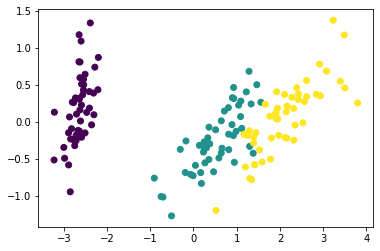

In [17]:
plt.scatter(X[:,0],X[:,1],c=y)

### 準備訓練測試資料

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=8)

In [20]:
from sklearn.svm import SVC

In [29]:
clf=SVC(gamma='auto')

In [31]:
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
y_predict=clf.predict(x_test)

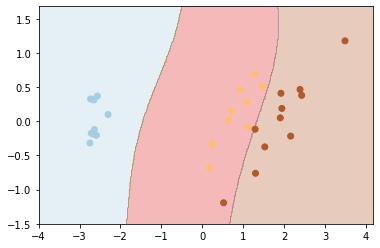

In [39]:
x0=np.arange(-4,4.2,0.02)
y0=np.arange(-1.5,1.7,0.02)

xm,ym=np.meshgrid(x0,y0)
P=np.c_[xm.ravel(),ym.ravel()]
z=clf.predict(P)
Z=z.reshape(xm.shape)

plt.contourf(xm,ym,Z,alpha=0.3,cmap="Paired")
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap="Paired")

# K-Means自動分類

In [40]:
x=np.random.rand(100,2)

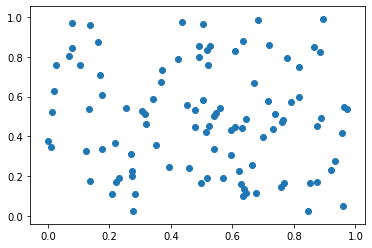

In [41]:
plt.scatter(x[:,0],x[:,1])

### step1 打開函數學習機

In [42]:
from sklearn.cluster import KMeans

In [44]:
clf=KMeans(n_clusters=3)#分３類

### step2 學習

In [45]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### step3 預測

In [47]:
clf.predict(x)

array([2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0,
       0, 0, 2, 2, 0, 1, 2, 1, 0, 0, 0, 0], dtype=int32)

In [49]:
clf.labels_# 可以不用用predict用labels即可

array([2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0,
       0, 0, 2, 2, 0, 1, 2, 1, 0, 0, 0, 0], dtype=int32)

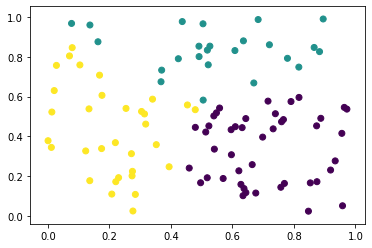

In [50]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_)

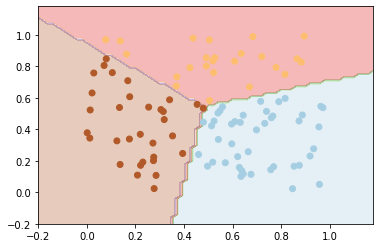

In [54]:
x0=y0=np.arange(-0.2,1.2,0.02)
xm,ym=np.meshgrid(x0,y0)

P=np.c_[xm.ravel(),ym.ravel()]
z=clf.predict(P)

Z=z.reshape(xm.shape)
plt.contourf(xm,ym,Z,alpha=0.3,cmap="Paired")
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap="Paired")

# `make_blobs` 生更像真實世界的數據

In [55]:
from sklearn.datasets.samples_generator import make_blobs

In [57]:
x,y=make_blobs(n_samples=500,centers=3,n_features=2,random_state=0)#500筆資料、分3類、二維資料

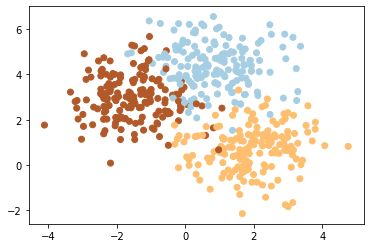

In [59]:
plt.scatter(x[:,0],x[:,1],c=y,cmap="Paired")

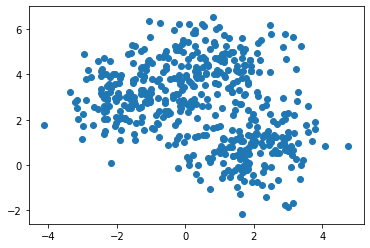

In [61]:
plt.scatter(x[:,0],x[:,1])

### 看Kmeans會怎麼分類 <br>step1 開函數學習機


In [63]:
clf=KMeans(n_clusters=3)

### step2 學習

In [64]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### step3 預測

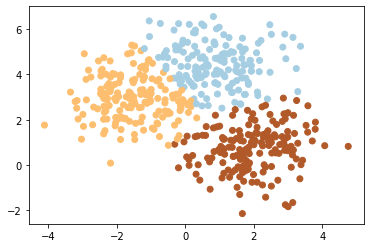

In [67]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap="Paired")

# Mean-Shifts完全自動分類

In [68]:
from sklearn.cluster import MeanShift

In [91]:
clf=MeanShift(bandwidth=0.9)#bandwidth控制分幾類

In [92]:
clf.fit(x)

MeanShift(bandwidth=0.9, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

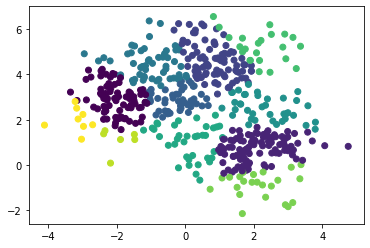

In [93]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_)

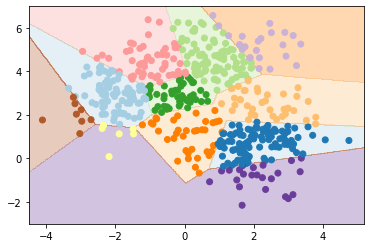

In [94]:
x0=np.arange(-4.5,5.2,0.02)
y0=np.arange(-3,7,0.02)

xm,ym=np.meshgrid(x0,y0)

P=np.c_[xm.ravel(),ym.ravel()]
z=clf.predict(P)
Z=z.reshape(xm.shape)

plt.contourf(xm,ym,Z,alpha=0.3,cmap="Paired")
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap="Paired")

# `cross_val_score`比較各種學習方法

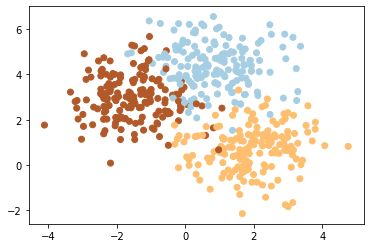

In [97]:
plt.scatter(x[:,0],x[:,1],c=y,cmap="Paired")

In [98]:
from sklearn.model_selection import cross_val_score

### SVC

In [99]:
from sklearn.svm import SVC

In [101]:
clf=SVC(gamma="auto")

In [104]:
scores=cross_val_score(clf,x,y,cv=5)

In [105]:
scores

array([0.94117647, 0.94059406, 0.98989899, 0.90909091, 0.92929293])

In [106]:
scores.max()

0.98989898989899

In [107]:
scores.mean()

0.9420106716554008

### Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
clf=DecisionTreeClassifier()

In [110]:
scores=cross_val_score(clf,x,y,cv=5)

In [111]:
scores.max()

0.9494949494949495

In [112]:
scores.mean()

0.9039262749804392

## Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
clf=RandomForestClassifier(n_estimators=100)#中一百棵樹

In [118]:
score=cross_val_score(clf,x,y,cv=5)

In [119]:
score

array([0.91176471, 0.92079208, 0.96969697, 0.88888889, 0.8989899 ])

In [120]:
score.max()

0.9696969696969697

In [121]:
score.mean()

0.9180265085332063